In [1]:
import sys
# print(sys.path)
sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/code/')
from main import *


random.seed = 9
df = main("between", 25, 0, 10, 0, 0, [0.3, 0.4, 0.3], True)


First, let us get the data for the learning and the non learning case

In [2]:
time = 15_000
agents = 100
from parameters import *
wealth_coordinates = [1/3, 1/3, 1/3]

df_baseline = main("between", time, 0, agents, 0, 0, wealth_coordinates, False)
df_baseline.to_csv("baseline3_15k.csv")
print(df_baseline.head())




 10%|▉         | 1478/15000 [00:04<00:38, 349.07it/s]


KeyboardInterrupt: 

In [ ]:
# def main(mode, MAX_GENERATIONS, PROBA_SELECTION, POPULATION_SIZE, CROSSOVER_RATE, MUTATION_RATE, wealth_coordinates, tqdm_display):
df_learning = main("between", time, PROBA_SELECTION, agents, 0, MUTATION_RATE, wealth_coordinates, False)
df_learning.to_csv("learning3_15k.csv")
print(df_learning.head())

100%|██████████| 15000/15000 [00:41<00:00, 364.70it/s]


   Gen   Price     Mismatch  Dividends  RDividend        Volume  Rep  \
0  0.0  104.76  4455.612972   0.003894   1.006011  8.166709e+05  0.0   
1  1.0  105.04  2778.724109   0.003862  -1.337563  7.770998e+05  0.0   
2  2.0  104.97  6891.983145   0.003780  -3.355636  1.446830e+06  0.0   
3  3.0  103.32  3590.039348   0.003764  -0.677484  7.188256e+05  0.0   
4  4.0  102.40  -323.723613   0.003719  -1.895382  1.669394e+06  0.0   

         Pos+  Pos-  NegW_per  ...  Spoils     TimeA     TimeB         TimeC  \
0  50000000.0   0.0       0.0  ...     0.0  0.000083  0.000035  1.670001e-07   
1  50000000.0   0.0       0.0  ...     0.0  0.000062  0.000040  3.386670e-04   
2  50000000.0   0.0       0.0  ...     0.0  0.000064  0.000041  1.646660e-04   
3  50000000.0   0.0       0.0  ...     0.0  0.000055  0.000037  1.199160e-04   
4  50000000.0   0.0       0.0  ...     0.0  0.000054  0.000034  1.201670e-04   

      TimeD     TimeE     TimeF     TimeG  TotalTime  PerSpoils  
0  0.000127  0.00127

Now let us compare the simulations.
## Volume

In [ ]:
df_learning = pd.read_csv('learning3_15k.csv')
df_baseline = pd.read_csv('baseline3_15k.csv')

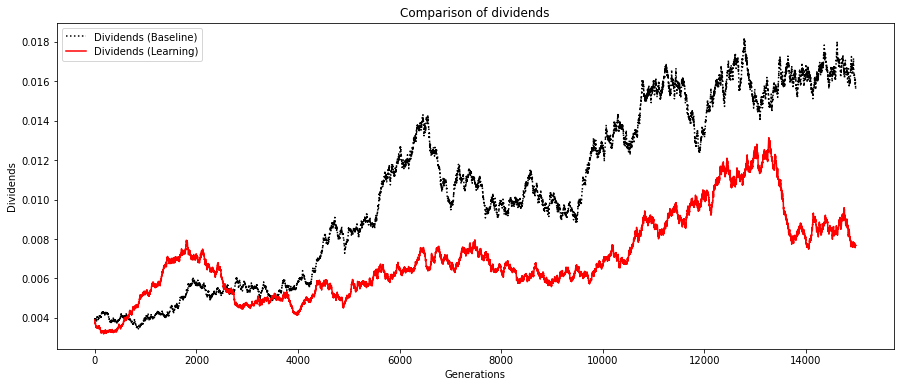

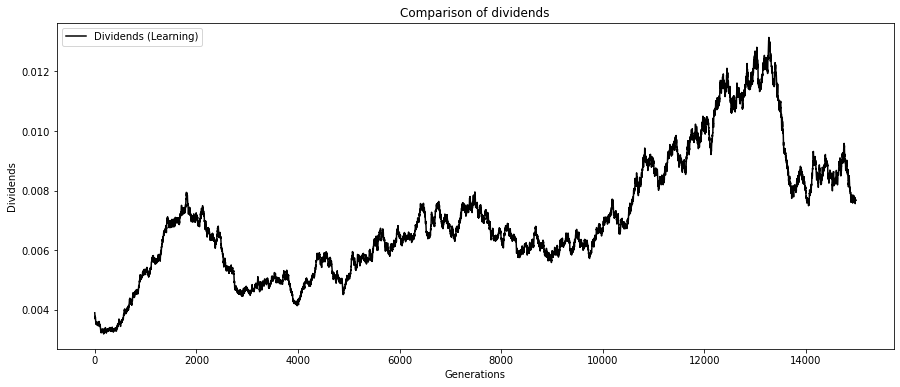

In [ ]:
    ''' Dividends '''
    import pandas as pd
    import matplotlib
    import matplotlib.pyplot as plt 
    
    data = pd.DataFrame()
    data['Dividends (Baseline)'] = df_baseline['Dividends']
    data['Dividends (Learning)'] = df_learning['Dividends']
    data['Gen'] = df_learning['Gen']
    data.plot(x="Gen", y = ["Dividends (Baseline)", "Dividends (Learning)"],
            kind="line", figsize=(15, 6), title='Comparison of dividends', 
            color = ['black','red'],
            style = [':','-'])
    plt.xlabel('Generations')
    plt.ylabel('Dividends')
    plt.show()

data = pd.DataFrame()
data['Dividends (Learning)'] = df_learning['Dividends']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["Dividends (Learning)"],
        kind="line", figsize=(15, 6), title='Comparison of dividends', 
        color = ['black'],
        style = ['-'])
plt.xlabel('Generations')
plt.ylabel('Dividends')
plt.show()

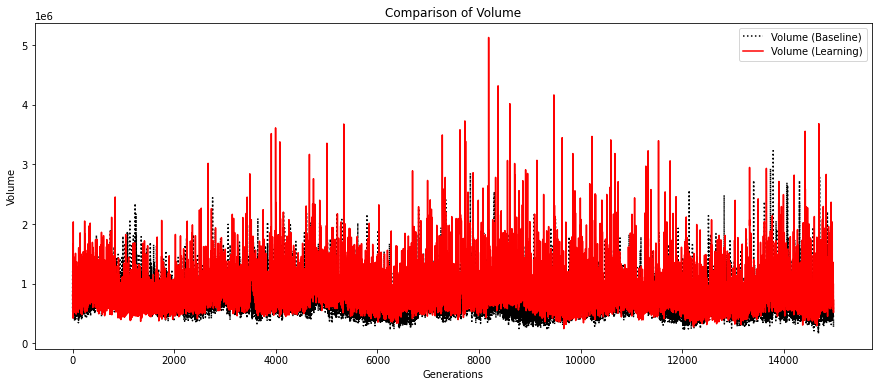

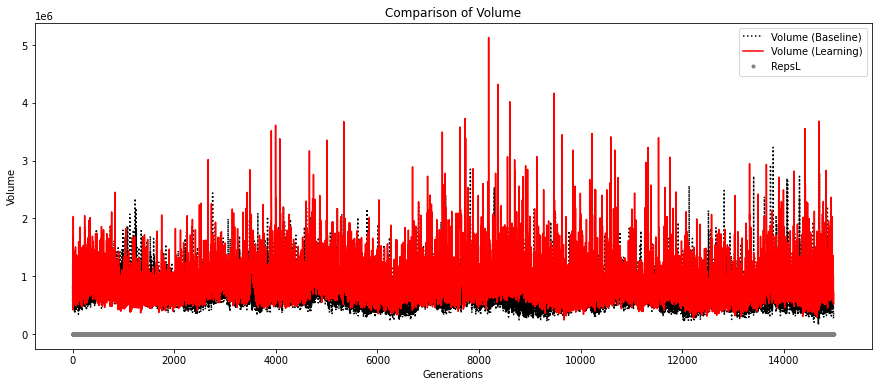

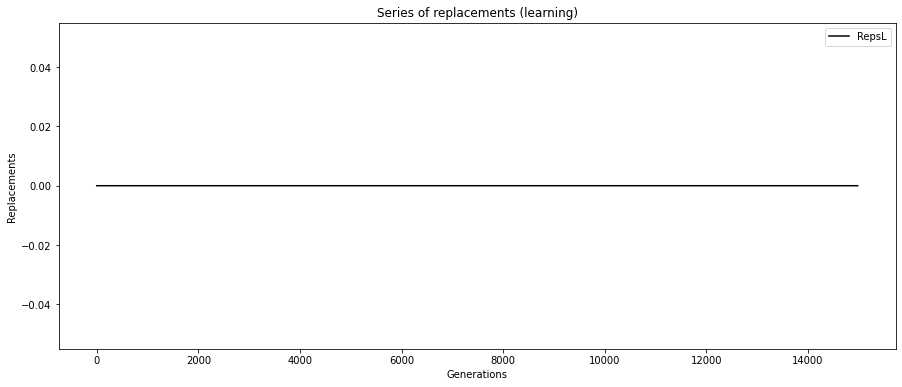

In [ ]:
''' Volume '''
data = pd.DataFrame()
data['Volume (Baseline)'] = df_baseline['Volume']
data['Volume (Learning)'] = df_learning['Volume']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["Volume (Baseline)", "Volume (Learning)"],
    kind="line", figsize=(15, 6), title='Comparison of Volume', 
    color = ['black','red'],
    style = [':','-'])
plt.xlabel('Generations')
plt.ylabel('Volume')
plt.show()

''' Volume '''
data = pd.DataFrame()
data['Volume (Baseline)'] = df_baseline['Volume']
data['Volume (Learning)'] = df_learning['Volume']
data["RepsL"] = 4000000 * df_learning['Rep']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["Volume (Baseline)", "Volume (Learning)", "RepsL"],
    kind="line", figsize=(15, 6), title='Comparison of Volume', 
    color = ['black','red', 'gray'],
    style = [':','-', '.'])
plt.xlabel('Generations')
plt.ylabel('Volume')
plt.show()

''' Volume '''
data = pd.DataFrame()

data["RepsL"] = df_learning['Rep']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["RepsL"],
    kind="line", figsize=(15, 6), title='Series of replacements (learning)', 
    color = ['black'],
    style = ['-'])
plt.xlabel('Generations')
plt.ylabel('Replacements')
plt.show()

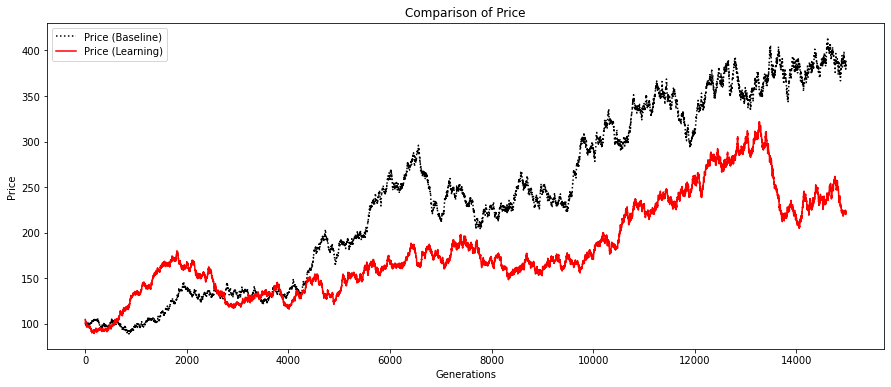

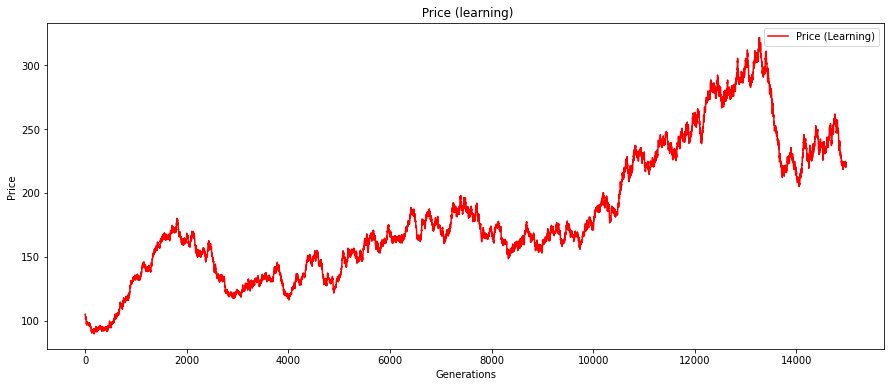

In [ ]:
''' Price '''

data = pd.DataFrame()
data['Price (Baseline)'] = df_baseline['Price']
data['Price (Learning)'] = df_learning['Price']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["Price (Baseline)", "Price (Learning)"],
    kind="line", figsize=(15, 6), title='Comparison of Price', 
    color = ['black','red'],
    style = [':','-'])
plt.xlabel('Generations')
plt.ylabel('Price')
plt.show()

data = pd.DataFrame()

data['Price (Learning)'] = df_learning['Price']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["Price (Learning)"],
    kind="line", figsize=(15, 6), title=' Price (learning)', 
    color = ['red'],
    style = ['-'])
plt.xlabel('Generations')
plt.ylabel('Price')
plt.show()

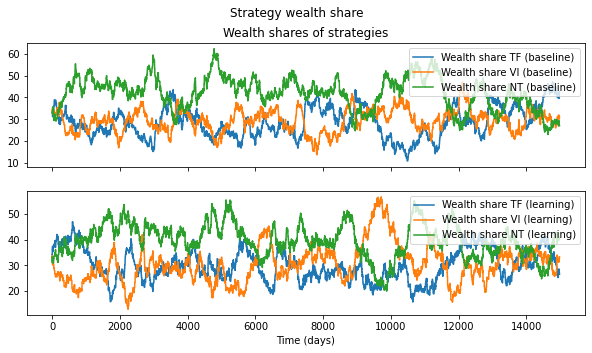

In [ ]:
''' Wealth distributions '''

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 5), sharex = True)
fig.suptitle('Strategy wealth share')
ax1.plot(df_baseline["WShare_TF"], label = 'Wealth share TF (baseline)')
ax1.plot(df_baseline["WShare_VI"], label = 'Wealth share VI (baseline)')
ax1.plot(df_baseline["WShare_NT"], label = 'Wealth share NT (baseline)')

ax2.plot(df_learning["WShare_TF"], label = 'Wealth share TF (learning)')
ax2.plot(df_learning["WShare_VI"], label = 'Wealth share VI (learning)')
ax2.plot(df_learning["WShare_NT"], label = 'Wealth share NT (learning)')

# ax2.plot(df["Sum_rel_mag_sq"], label = 'Variability')
# ax2.plot(df["Sum_rel_mag_sq_ema"], label = 'Variability (EMA)')
ax1.legend()
ax2.legend()
# ax2.set_ylim(0,15)
ax2.set_xlabel('Time (days)')
ax1.set_title('Wealth shares of strategies')
# ax2.set_title('Squared sum of wealths share changes')
plt.show()


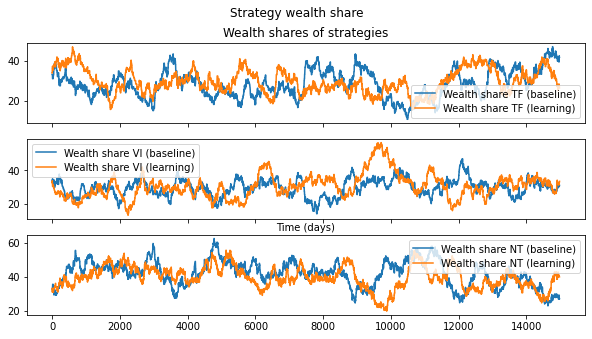

In [ ]:
''' Wealth distributions '''

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 5), sharex = True)
fig.suptitle('Strategy wealth share')
ax1.plot(df_baseline["WShare_TF"], label = 'Wealth share TF (baseline)')
ax1.plot(df_learning["WShare_TF"], label = 'Wealth share TF (learning)')

ax2.plot(df_baseline["WShare_VI"], label = 'Wealth share VI (baseline)')
ax2.plot(df_learning["WShare_VI"], label = 'Wealth share VI (learning)')

ax3.plot(df_baseline["WShare_NT"], label = 'Wealth share NT (baseline)')
ax3.plot(df_learning["WShare_NT"], label = 'Wealth share NT (learning)')

# ax2.plot(df["Sum_rel_mag_sq"], label = 'Variability')
# ax2.plot(df["Sum_rel_mag_sq_ema"], label = 'Variability (EMA)')
ax1.legend()
ax2.legend()
ax3.legend()
# ax2.set_ylim(0,15)
ax2.set_xlabel('Time (days)')
ax1.set_title('Wealth shares of strategies')
# ax2.set_title('Squared sum of wealths share changes')
plt.show()

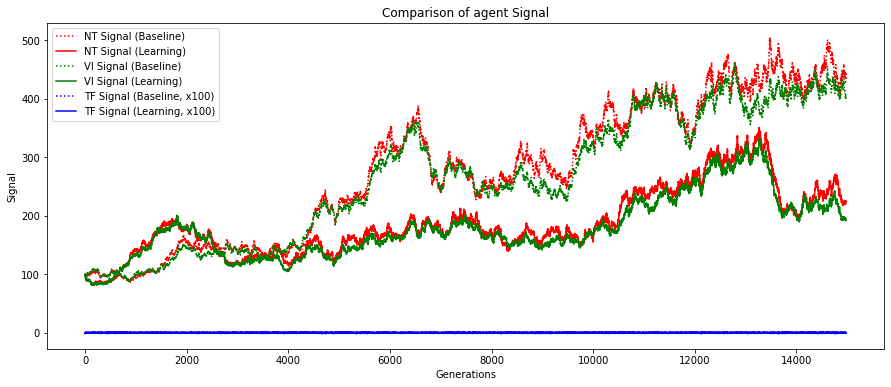

In [ ]:
    ''' Signal '''
    data['NT Signal (Baseline)'] = df_baseline['NT_signal']
    data['NT Signal (Learning)'] = df_learning['NT_signal']
    data['VI Signal (Baseline)'] = df_baseline['VI_signal']
    data['VI Signal (Learning)'] = df_learning['VI_signal']
    data['TF Signal (Baseline, x100)'] = 100 * df_baseline['TF_signal']
    data['TF Signal (Learning, x100)'] = 100 * df_learning['TF_signal']
    data['Gen'] = df_learning['Gen']
    data.plot(x="Gen", y = ["NT Signal (Baseline)", "NT Signal (Learning)","VI Signal (Baseline)", 
        "VI Signal (Learning)","TF Signal (Baseline, x100)", "TF Signal (Learning, x100)"],
            kind="line", figsize=(15, 6), title='Comparison of agent Signal', 
            color = ['r', 'r', 'g', 'g', 'b', 'b'],
            style = [':', '-', ':', '-', ':', '-'])
    plt.xlabel('Generations')
    plt.ylabel('Signal')
    plt.show()


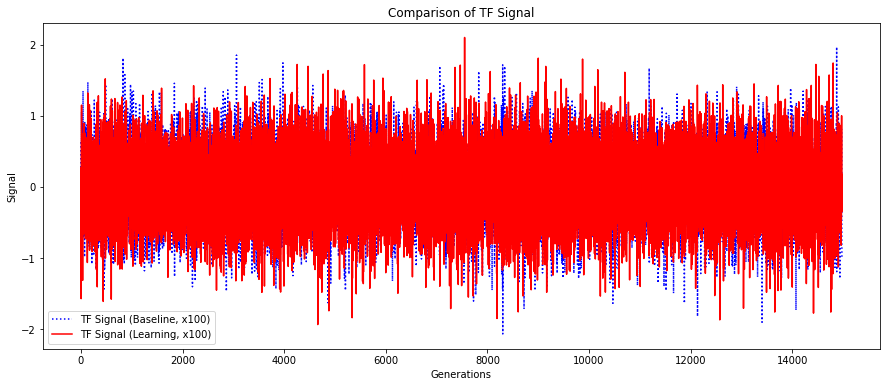

In [ ]:
''' Signal '''

data['TF Signal (Baseline, x100)'] = 100 * df_baseline['TF_signal']
data['TF Signal (Learning, x100)'] = 100 * df_learning['TF_signal']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["TF Signal (Baseline, x100)", "TF Signal (Learning, x100)"],
        kind="line", figsize=(15, 6), title='Comparison of TF Signal', 
        color = ['b', 'r'],
        style = [':', '-'])
plt.xlabel('Generations')
plt.ylabel('Signal')
plt.show()

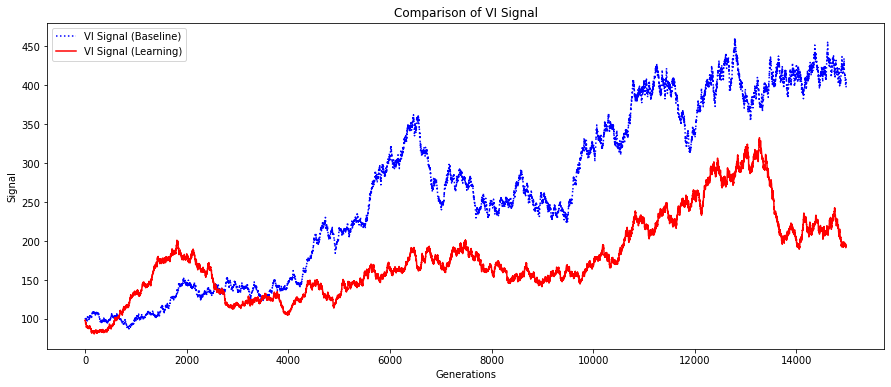

In [ ]:
''' Signal '''

data['VI Signal (Baseline)'] = df_baseline['VI_signal']
data['VI Signal (Learning)'] = df_learning['VI_signal']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["VI Signal (Baseline)", "VI Signal (Learning)"],
        kind="line", figsize=(15, 6), title='Comparison of VI Signal', 
        color = ['b', 'r'],
        style = [':', '-'])
plt.xlabel('Generations')
plt.ylabel('Signal')
plt.show()

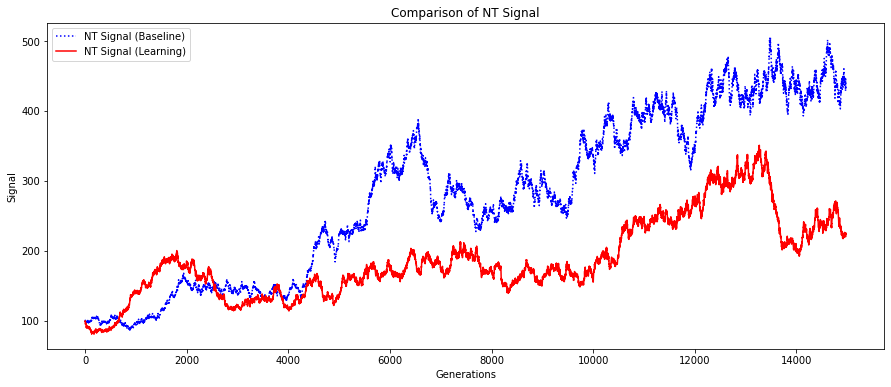

In [ ]:
''' Signal '''

data['NT Signal (Baseline)'] = df_baseline['NT_signal']
data['NT Signal (Learning)'] = df_learning['NT_signal']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["NT Signal (Baseline)", "NT Signal (Learning)"],
        kind="line", figsize=(15, 6), title='Comparison of NT Signal', 
        color = ['b', 'r'],
        style = [':', '-'])
plt.xlabel('Generations')
plt.ylabel('Signal')
plt.show()

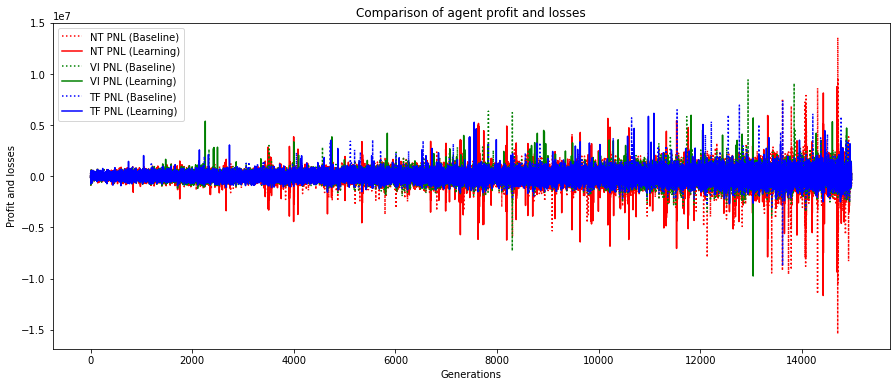

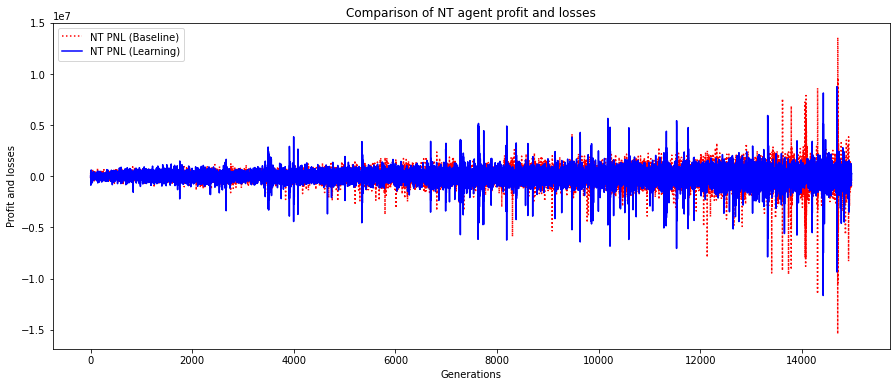

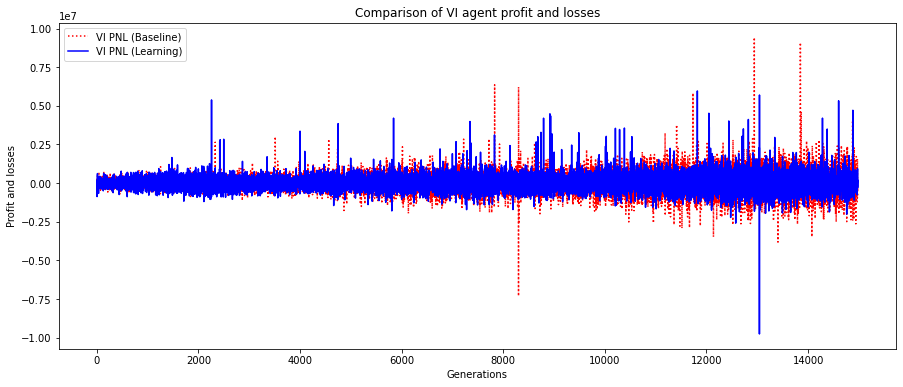

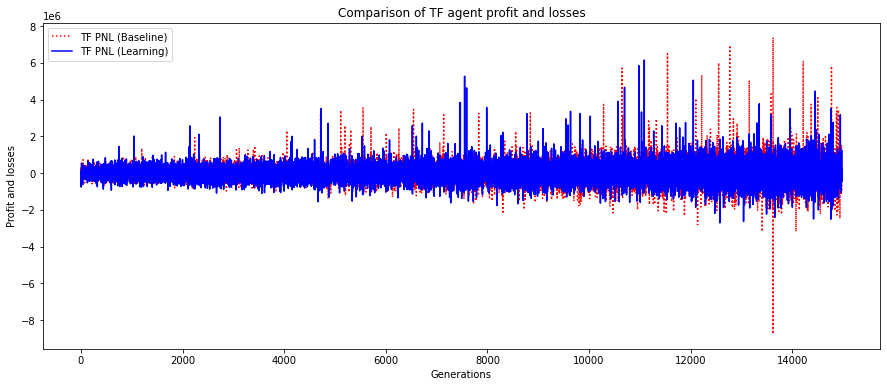

In [ ]:
''' PNL '''

''' Profit and losses '''
data['NT PNL (Baseline)'] = df_baseline['NT_pnl']
data['NT PNL (Learning)'] = df_learning['NT_pnl']
data['VI PNL (Baseline)'] = df_baseline['VI_pnl']
data['VI PNL (Learning)'] = df_learning['VI_pnl']
data['TF PNL (Baseline)'] = df_baseline['TF_pnl']
data['TF PNL (Learning)'] = df_learning['TF_pnl']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["NT PNL (Baseline)", "NT PNL (Learning)","VI PNL (Baseline)", 
    "VI PNL (Learning)","TF PNL (Baseline)", "TF PNL (Learning)"],
        kind="line", figsize=(15, 6), title='Comparison of agent profit and losses', 
        color = ['r', 'r', 'g', 'g', 'b', 'b'],
        style = [':', '-', ':', '-', ':', '-'])
plt.xlabel('Generations')
plt.ylabel('Profit and losses')
plt.show()

''' PNL '''

''' Profit and losses '''
data['NT PNL (Baseline)'] = df_baseline['NT_pnl']
data['NT PNL (Learning)'] = df_learning['NT_pnl']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["NT PNL (Baseline)", "NT PNL (Learning)"],
        kind="line", figsize=(15, 6), title='Comparison of NT agent profit and losses', 
        color = ['r', 'b'],
        style = [':', '-'])
plt.xlabel('Generations')
plt.ylabel('Profit and losses')
plt.show()

''' Profit and losses '''
data['VI PNL (Baseline)'] = df_baseline['VI_pnl']
data['VI PNL (Learning)'] = df_learning['VI_pnl']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["VI PNL (Baseline)", "VI PNL (Learning)"],
        kind="line", figsize=(15, 6), title='Comparison of VI agent profit and losses', 
        color = ['r', 'b'],
        style = [':', '-'])
plt.xlabel('Generations')
plt.ylabel('Profit and losses')
plt.show()

''' Profit and losses '''
data['TF PNL (Baseline)'] = df_baseline['TF_pnl']
data['TF PNL (Learning)'] = df_learning['TF_pnl']
data['Gen'] = df_learning['Gen']
data.plot(x="Gen", y = ["TF PNL (Baseline)", "TF PNL (Learning)"],
        kind="line", figsize=(15, 6), title='Comparison of TF agent profit and losses', 
        color = ['r', 'b'],
        style = [':', '-'])
plt.xlabel('Generations')
plt.ylabel('Profit and losses')
plt.show()